<a href="https://colab.research.google.com/github/pazcalll/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengubah kontras dan tingkat kecerahan citra 
---------------------------------
Masukkan tingkat kecerahan [-255 up to 255]: 40
Masukkan kontras [1.0 up to 3.0]: 1.0


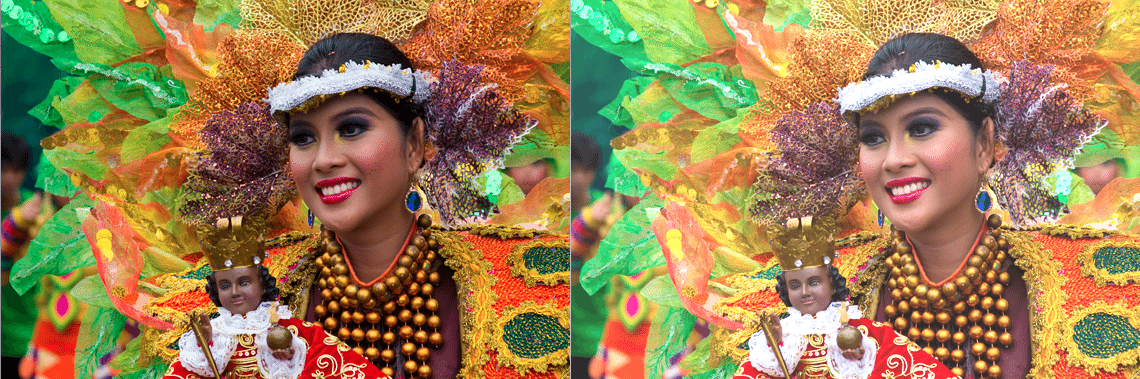

In [8]:
print('Mengubah kontras dan tingkat kecerahan citra ')
print('---------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 up to 255]: '))
  contrast = float(input('Masukkan kontras [1.0 up to 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255) 
      # print(y, " ",x," ",c)

# cara simple tanpa loop
# brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log 
---------------------------------------------------------
Masukkan tingkat kecerahan [-255 up to 255]: 40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


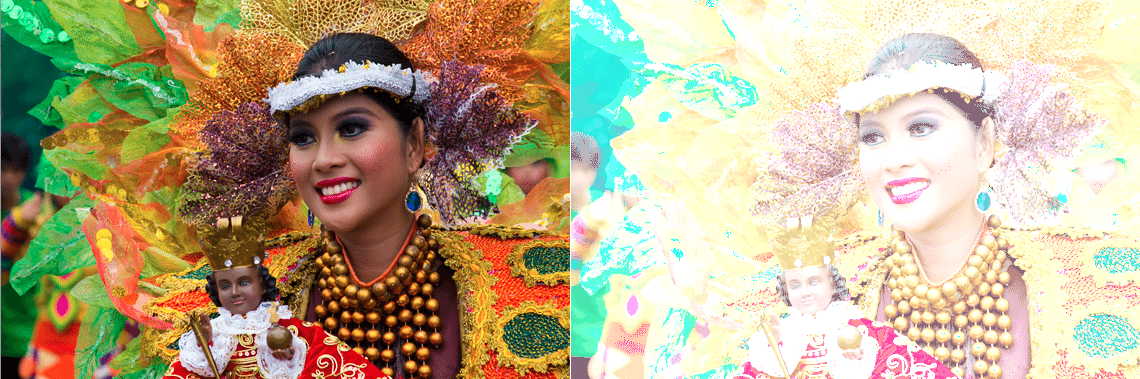

In [15]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('---------------------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 up to 255]: '))
  # contrast = float(input('Masukkan kontras [1.0 up to 3.0]: '))
except ValueError:
  print('Error, not a nu4mber')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
# log_img = np.zeros(original.shape, original.dtype)
log_img = original

# Apply log transformation method 
const = 255 / np.log(1 + np.max(log_img)) 
log_image = const * (np.log(log_img + 1)) 

# Specify the data type so that 
# float value will be converted to int 
log_image = np.array(log_image, dtype = np.uint8) 
tmp = log_image

for y in range(tmp.shape[0]):
  for x in range(tmp.shape[1]):
    for c in range(tmp.shape[2]):
      log_image[y,x,c] = np.clip(tmp[y,x,c] + brightness, 0, 255) 
      # print(y, " ",x," ",c)

final_frame = cv.hconcat((original, log_image))
cv2_imshow(final_frame)

Grayscale with Averaging:


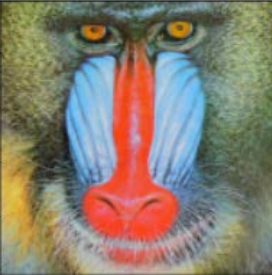

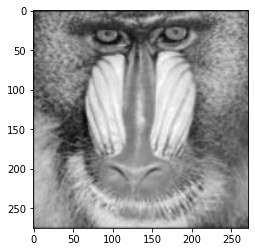

In [227]:
print('Grayscale with Averaging:')
original = cv.imread('/content/drive/MyDrive/PCVK/Images/ape.png')
average_img = np.mean(original, axis = 2)

cv2_imshow(original)
plt.imshow(average_img, cmap = 'gray')

Grayscale with Luminance


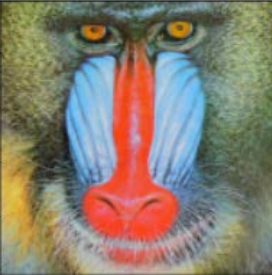

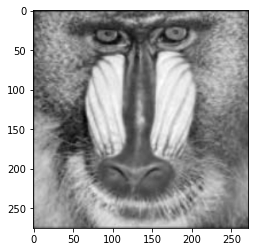

In [29]:
print('Grayscale with Luminance')
R, G, B = original[:,:,0], original[:,:,1], original[:,:,2]
z = 0.21*R + 0.72*G + 0.07*B

cv2_imshow(original)
plt.imshow(z, cmap = 'gray')

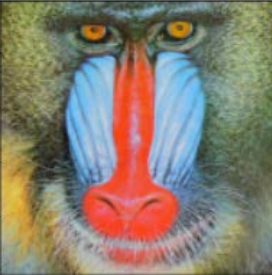

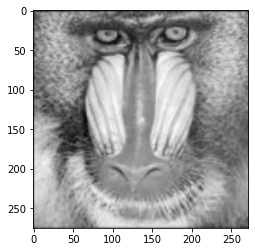

In [58]:
base = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

cv2_imshow(original)
plt.imshow(base, cmap='gray')

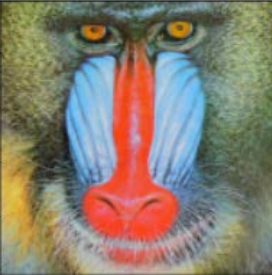

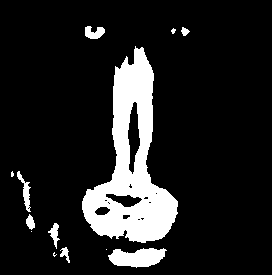

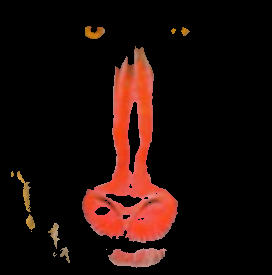

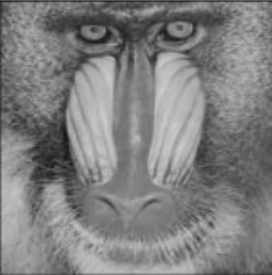

In [267]:
# yellow 252, 182, 3
# red 252, 3, 3
# l = np.uint8([[[161, 155, 84]]])
# u = np.uint8([[[179, 255, 255]]])

# Convert BGR to HSV
new_ori = original
back = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
hsv = cv.cvtColor(new_ori, cv.COLOR_BGR2HSV)
# define range of blue color in HSV
lower_blue = np.array([0, 70, 140])
upper_blue = np.array([19, 255, 255])
# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)
# Bitwise-AND mask and original image
res = cv.bitwise_and(new_ori, new_ori, mask= mask)
cv2_imshow(new_ori)
cv2_imshow(mask)
# res = cv.bitwise_and(res, res, mask= back)
cv2_imshow(res)
cv2_imshow(back)